# Clustering Crypto

In [164]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [165]:
file_path = Path('Resources/crypto_data.csv')
df = pd.read_csv(file_path, index_col = 0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [166]:
# Keep all the cryptocurrencies that are being traded.
traded_df = df.loc[df['IsTrading'] == True]
print(traded_df.count())
traded_df.head(10)

CoinName           1144
Algorithm          1144
IsTrading          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [167]:
# Remove the "IsTrading" column. 
traded_df = traded_df.drop(['IsTrading'], axis = 1)
traded_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [168]:
# Remove rows that have at least 1 null value.
traded_df = traded_df.dropna()
traded_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [169]:
# Keep the rows where coins are mined.
mined_df = traded_df.loc[df['TotalCoinsMined'] > 0]
mined_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [170]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names = pd.DataFrame(mined_df['CoinName'], columns = ['CoinName'])
crypto_names.count()

CoinName    532
dtype: int64

In [171]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
mined_df = mined_df.drop(['CoinName'], axis = 1)
mined_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [172]:
# Use get_dummies() to create variables for text features.
ndf = pd.get_dummies(mined_df, columns = ['Algorithm', 'ProofType'])
ndf.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(ndf)
print(crypto_scaled[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

### Deliverable 2: Reducing Data Dimensions Using PCA

In [174]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components = 3)
crypto_pca  = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-0.33998433,  1.04143148, -0.59813323],
       [-0.32331179,  1.04154113, -0.59848047],
       [ 2.30167953,  1.65377339, -0.63563384],
       ...,
       [ 0.32440167, -2.30258482,  0.42672883],
       [-0.14577516, -2.04408778,  0.41748858],
       [-0.29305747,  0.83732513, -0.27664473]])

In [175]:
# Create a DataFrame with the three principal components.
crypto_pca_df = pd.DataFrame(data = crypto_pca,index = ndf.index, columns = ['PC 1', 'PC 2', 'PC 3'])
crypto_pca_df

,PC 1,PC 2,PC 3
42,-0.339984,1.041431,-0.598133
404,-0.323312,1.041541,-0.598480
1337,2.301680,1.653773,-0.635634
BTC,-0.151698,-1.309436,0.214591
ETH,-0.150675,-2.041385,0.406873
...,...,...,...
ZEPH,2.458377,0.848987,-0.044409
GAP,-0.338028,1.041312,-0.598154
BDX,0.324402,-2.302585,0.426729
ZEN,-0.145775,-2.044088,0.417489


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\choju\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



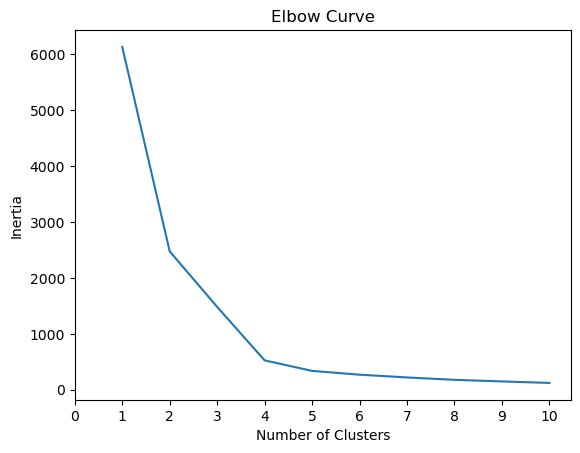

In [241]:
# Create an elbow curve to find the best value for K.
inertia = []


def test_cluster_amount(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=5)
    model

    # Fitting model
    model.fit(df)

    # Add a new class column to df_iris
    df["class"] = model.labels_
    inertia.append(model.inertia_)

k = list(range(1,11))
    
for i in k:
    test_cluster_amount(crypto_pca_df, i)
    
elbow_data = {"k":k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

import matplotlib.pyplot as plt

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()




Running K-Means with `k=4`

In [177]:
km = KMeans(n_clusters = 4, random_state = 5)

km.fit(crypto_pca_df)

predictions = km.predict(crypto_pca_df)
predictions

array([1, 1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 3, 1, 1, 0, 0, 0, 0, 1, 1, 3, 3,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 1,
       0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 3, 1, 3, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0,
       0, 1, 0, 0, 1, 3, 0, 3, 1, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 3, 0, 3, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 3, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 0, 3, 3, 1, 1, 1, 1, 0, 1, 3, 1,
       1, 0, 0, 0, 3, 1, 0, 3, 1, 3, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 3, 0, 3, 3, 0, 0, 0, 0, 0, 1,

In [189]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = mined_df.join(crypto_pca_df)
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = crypto_names

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class']=km.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 10)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.339984,1.041431,-0.598133,4,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.323312,1.041541,-0.598480,4,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.301680,1.653773,-0.635634,7,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.151698,-1.309436,0.214591,0,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.150675,-2.041385,0.406873,5,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.169667,-1.109932,-0.029306,0,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.389382,1.224371,-0.502617,4,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.147784,-2.230563,0.411084,5,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.149116,-2.041488,0.406858,5,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.145774,-2.044088,0.417489,5,ZCash,3


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [222]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x = "PC 1",
    y = "PC 2",
    z = "PC 3",
    color = "Class",
    symbol = "Class",
    hover_name = clustered_df.CoinName,
    hover_data = ['Algorithm']
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [227]:
# Create a table with tradable cryptocurrencies.
table = clustered_df.hvplot.table(columns = ['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'])
table

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [238]:
# Print the total number of tradable cryptocurrencies.
print(f"There are {clustered_df['CoinName'].count()} tradeable cryptocurrencies")

There are 532 tradeable cryptocurrencies


In [257]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scaler = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply','TotalCoinsMined']])
print(scaler)

[[4.20000000e-11 0.00000000e+00]
 [5.32000000e-04 1.06585544e-03]
 [3.14159265e-01 2.95755135e-02]
 ...
 [1.40022261e-03 9.90135079e-04]
 [2.10000000e-05 7.37028150e-06]
 [1.00000000e-06 1.29582282e-07]]


In [260]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(scaler, index = clustered_df.index, columns = ['TotalCoinSupply', 'TotalCoinsMined'])

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = crypto_names

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class']=km.labels_

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.141593e-01,0.029576,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,3
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,1
XMR,0.000000e+00,0.000017,Monero,3
ETC,2.100000e-04,0.000115,Ethereum Classic,3
ZEC,2.100000e-05,0.000007,ZCash,3


In [265]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x ="TotalCoinsMined", y="TotalCoinSupply", color = "Class")


:Scatter   [TotalCoinsMined]   (TotalCoinSupply,Class)